# Breast Cancer Wisconsin Data Classification Using Stacked Ensemble Method  
  
  In this project, we train a stacked model to classify [__Breast Cancer Wisconsin__](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29) Dataset. Stacked models often perform better in terms of classification accuracy and generalization. Also, they do not require heavy hyperparameter tuning. These advantages come at the cost of increased complexity. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/home/kaveh/Documents/ML/Datasets/Breast Cancer Wisconsin/breast-cancer-wisconsin.data', 
            header = None, names = [
                'id', 'c_thickness', 'uni_size', 'uni_shape', 'marg', 'epi_size', 'nucl', 'chrom', 'normal', 'mitoses', 'class'
            ])

In [3]:
df.head()

,id,c_thickness,uni_size,uni_shape,marg,epi_size,nucl,chrom,normal,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           699 non-null    int64 
 1   c_thickness  699 non-null    int64 
 2   uni_size     699 non-null    int64 
 3   uni_shape    699 non-null    int64 
 4   marg         699 non-null    int64 
 5   epi_size     699 non-null    int64 
 6   nucl         699 non-null    object
 7   chrom        699 non-null    int64 
 8   normal       699 non-null    int64 
 9   mitoses      699 non-null    int64 
 10  class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


We drop missing values denoted by "?".

In [5]:
df = df[df.nucl != '?']

In [6]:
df.shape

(683, 11)

In [7]:
df = df.astype('int32')

In [8]:
df.drop(columns = 'id', inplace = True)

In [9]:
df['class'] = df['class'].astype('category').cat.codes

In [10]:
df.tail()

,c_thickness,uni_size,uni_shape,marg,epi_size,nucl,chrom,normal,mitoses,class
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1
698,4,8,8,5,4,5,10,4,1,1


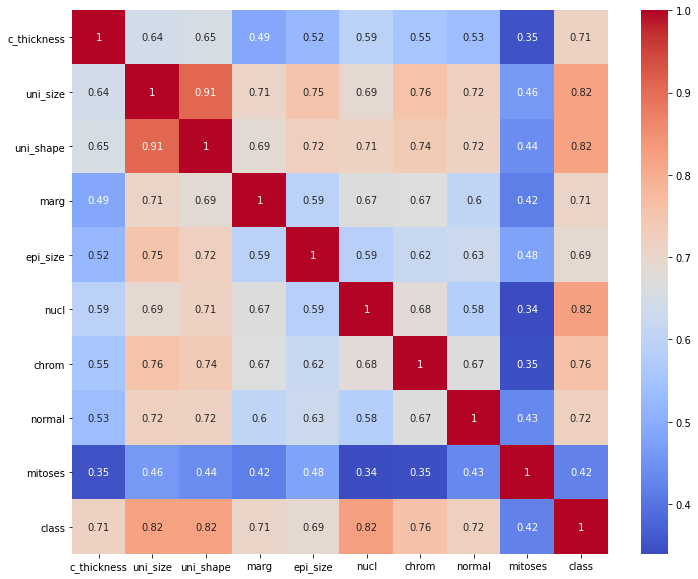

In [11]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'class').to_numpy(), df['class'].to_numpy(), 
                                                    test_size = 0.3, stratify = df['class'], random_state = 42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(478, 9)
(205, 9)
(478,)
(205,)


We use __Random Forest, AdaBoost, and MLP as base estimators. The final estimator is an SVM with gaussian kernel.__

In [14]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators = 10, random_state = 42)),
    ('ada', AdaBoostClassifier(random_state = 42, n_estimators = 10)),
    ('nn', make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes = (128, 128), random_state = 42)))
]

clf = StackingClassifier(n_jobs = -1, estimators = estimators, final_estimator = make_pipeline(StandardScaler(), SVC(random_state = 42)))
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [15]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       133
           1       0.93      0.99      0.96        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



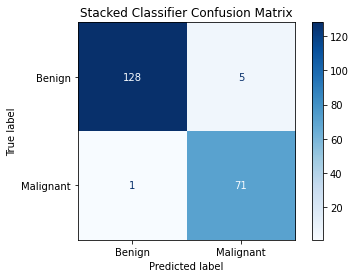

In [16]:
plot_confusion_matrix(
    clf, X_test, y_test, values_format = '', cmap = 'Blues', display_labels = ['Benign', 'Malignant']
)
plt.title('Stacked Classifier Confusion Matrix')
plt.show()

Now, we test off-the-shelf classifiers to see how they perform compared to our stacked model. 

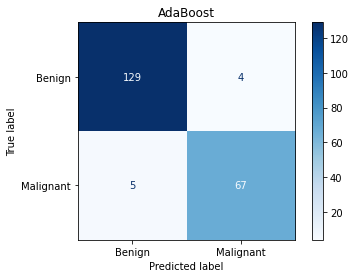

In [17]:
plot_confusion_matrix(
    AdaBoostClassifier(random_state = 42, n_estimators = 10).fit(X_train, y_train), X_test, y_test, values_format = '', cmap = 'Blues', display_labels = ['Benign', 'Malignant']
)
plt.title('AdaBoost')
plt.show()

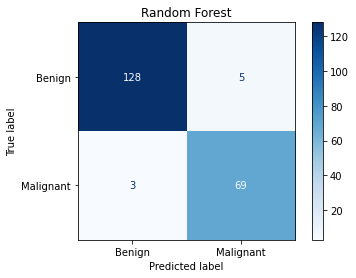

In [18]:
plot_confusion_matrix(
    RandomForestClassifier(n_estimators = 10, random_state = 42).fit(X_train, y_train), X_test, y_test, values_format = '', cmap = 'Blues', display_labels = ['Benign', 'Malignant']
)
plt.title('Random Forest')
plt.show()

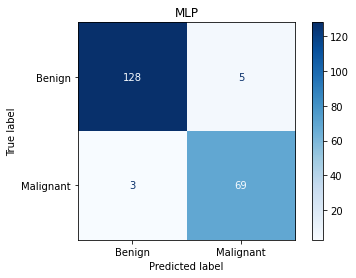

In [19]:
plot_confusion_matrix(
    make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes = (128, 128), random_state = 42)).fit(X_train, y_train), X_test, y_test, values_format = '', cmap = 'Blues', display_labels = ['Benign', 'Malignant']
)
plt.title('MLP')
plt.show()

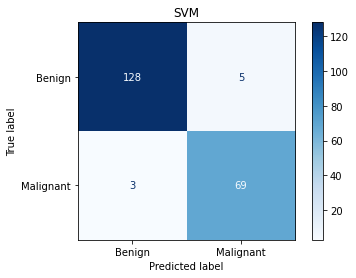

In [20]:
plot_confusion_matrix(
    make_pipeline(StandardScaler(), SVC(random_state = 42)).fit(X_train, y_train), X_test, y_test, values_format = '', cmap = 'Blues', display_labels = ['Benign', 'Malignant']
)
plt.title('SVM')
plt.show()

Our stacked model outperforms all individual off-the-shelf classifiers. However, the models were not fine-tuned. 

## References  
  Wolberg, W.H., & Mangasarian, O.L. (1990). Multisurface method of pattern separation for medical diagnosis applied to breast cytology. In Proceedings of the National Academy of Sciences, 87, 9193--9196.

Zhang, J. (1992). Selecting typical instances in instance-based learning. In Proceedings of the Ninth International Machine Learning Conference (pp. 470--479). Aberdeen, Scotland: Morgan Kaufmann.